In [3]:
import findspark
findspark.init()

import wptools
import pyspark
import pyspark.sql
from pyspark.sql import *
import os.path
from pyspark.sql.functions import desc

from pyspark.sql import dataframe
from pyspark.sql import functions as F

from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
import seaborn as sns
import re

In [4]:
DATA_DIR = '../data/data_processed/'

In [5]:
the_data = spark.read.parquet(DATA_DIR+"union_3_cat.parquet")

In [6]:
# Quantifying null values
# how many rows does the dataframe have?
mili_rows=the_data.count()
from pyspark.sql.functions import isnan, when, count, col

mili_nan = the_data.select([
    count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in the_data.columns
]).toPandas()

mili_percentages_nan = mili_nan*100/mili_rows
mili_percentages_nan.head()

,id,title,categories,article_lenght,views,refs_count,link_count,death,end_date,location
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.331349,12.411266,11.088848


In [48]:
the_data.filter("id = 214659").show()

+------+--------+---------------+--------------+-------+----------+----------+--------------------+---------+--------------------+
|    id|   title|     categories|article_lenght|  views|refs_count|link_count|               death| end_date|            location|
+------+--------+---------------+--------------+-------+----------+----------+--------------------+---------+--------------------+
|214659|Unit 731|civilian attack|         58902|5427192|        78|       249|Over 3,000 from i...|1935–1945|[[Pingfang]], [[H...|
+------+--------+---------------+--------------+-------+----------+----------+--------------------+---------+--------------------+



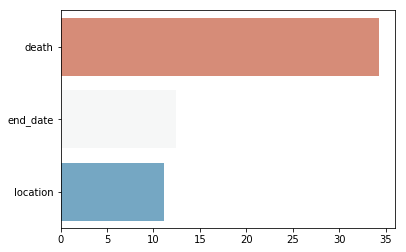

In [8]:
sns.barplot(data=mili_percentages_nan[['death','end_date','location']], palette='RdBu',orient='h')

In [42]:
the_data_pd = the_data.toPandas().set_index('id')
the_data_pd['end_date'].head(30)
# end date need to extract only four digits 

id
50429564                                           1 May 2016
39900222                                          22 May 2013
46935886                                    December 14, 1993
38247068                                                 None
19896366                                      21 October 2008
2234230                                 +1975-03-05T00:00:00Z
4538300                                           27 May 1940
12983993                                    September 3, 1984
10032978                                       March 11, 2007
41583832                    {{start date and age|1941|04|27}}
52461344                                      16 January 1993
14121621                    {{Start date|df|=|yes|2007|11|7}}
40565322                                 16–17 September 2013
32339772                                                 None
54874862                                       12 August 2017
52299027                                       29 August 1943
21465

In [36]:
the_data_pd.dtypes
the_data_pd['end_date'] = the_data_pd['end_date'].astype('str')
the_data_pd.dtypes

title             object
categories        object
article_lenght     int32
views              int64
refs_count         int64
link_count         int64
death             object
end_date          object
location          object
dtype: object

In [43]:
# extract 4 digits 
date_regex = re.compile('(\d{4})', re.IGNORECASE)
cleaned_date = the_data_pd['end_date'].str.extract(date_regex, expand=True)

In [44]:
cleaned_date.loc[214659]

0    1935
Name: 214659, dtype: object

# TODO: maybe select digits from the right (end) instead of the beginning!

